# Understanding decision trees (once and for all !)


This notebook aims at understanding how a Decision Tree is built using the iris dataset. It focuses on Decision Trees with a categorical target and continuous features.

## 1- Importing libraries

In [2]:
import pandas as pd
import numpy as np
from sklearn import datasets
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn import tree
# import graphviz
from IPython.display import Image, display
# import pydotplus

In [3]:
import warnings
warnings.filterwarnings('ignore')

## 2- Loading the data

In [5]:
iris = datasets.load_iris()
iris_df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])
iris_df.head(2)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0


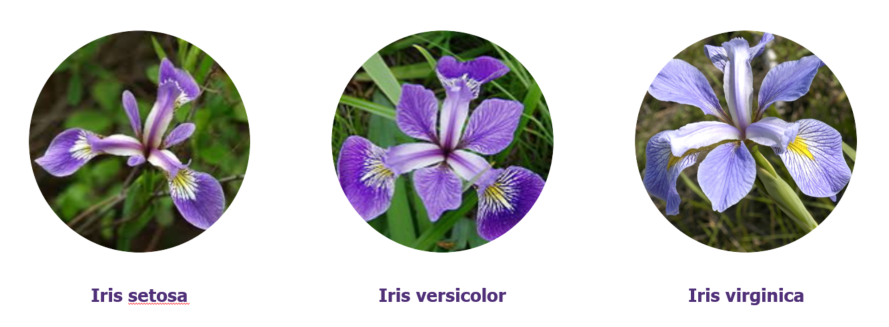

## 2- Data exploration

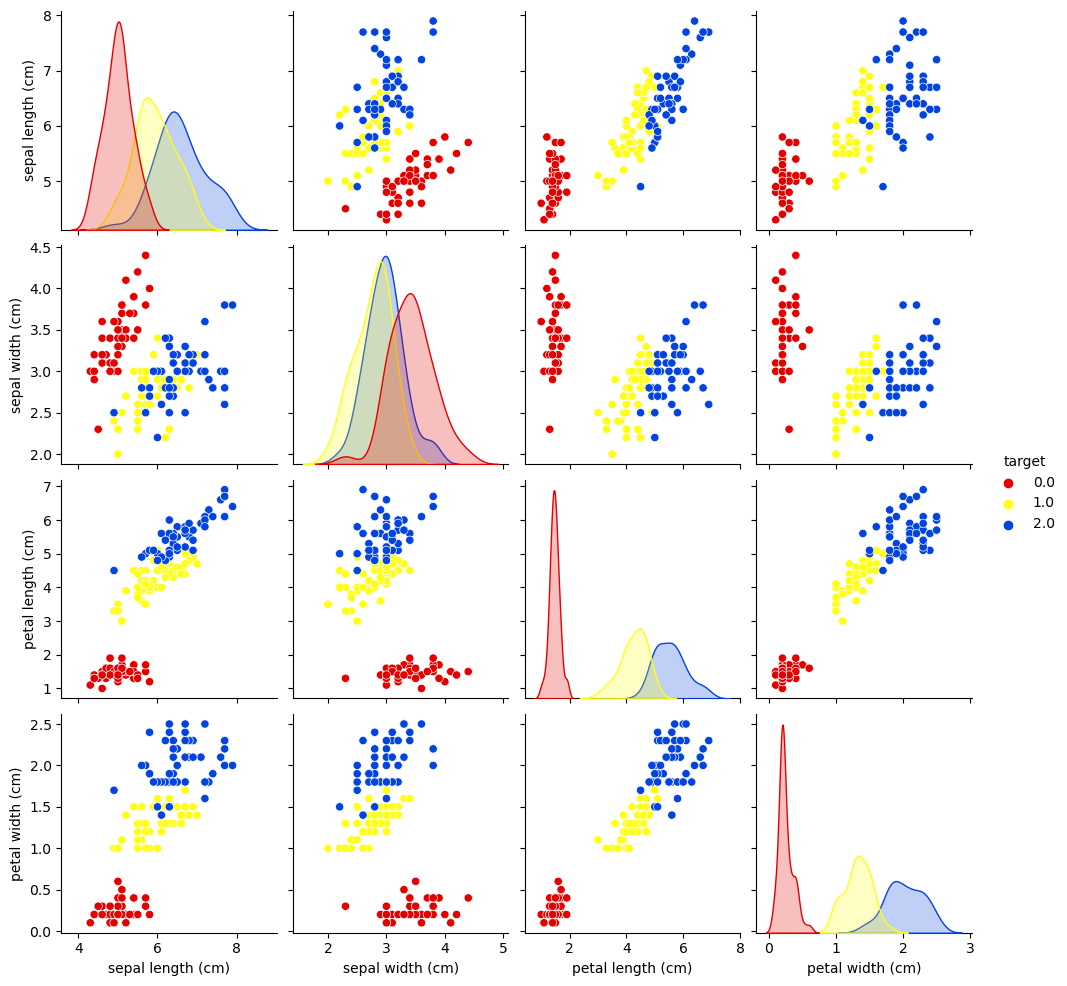

In [6]:
colors = ['red', 'yellow', 'blue']
sns.pairplot(iris_df, hue='target', palette=sns.xkcd_palette(colors))
plt.show()

                   sepal length (cm)  sepal width (cm)  petal length (cm)  \
sepal length (cm)           1.000000         -0.117570           0.871754   
sepal width (cm)           -0.117570          1.000000          -0.428440   
petal length (cm)           0.871754         -0.428440           1.000000   
petal width (cm)            0.817941         -0.366126           0.962865   
target                      0.782561         -0.426658           0.949035   

                   petal width (cm)    target  
sepal length (cm)          0.817941  0.782561  
sepal width (cm)          -0.366126 -0.426658  
petal length (cm)          0.962865  0.949035  
petal width (cm)           1.000000  0.956547  
target                     0.956547  1.000000  


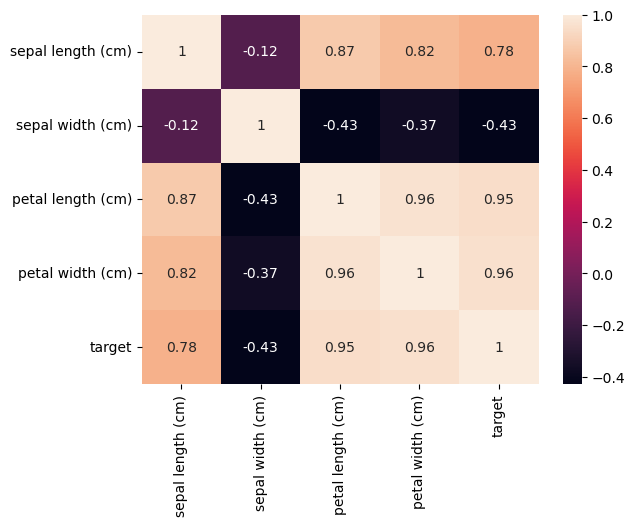

In [7]:
corr = iris_df.corr()
print(corr)
sns.heatmap(corr, annot=True)

plt.show()

## 3- Preparing the data

### Getting the names of the target

In [8]:
iris_df['target']

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
145    2.0
146    2.0
147    2.0
148    2.0
149    2.0
Name: target, Length: 150, dtype: float64

In [9]:
iris_df['target'] = iris_df['target'].map({0: iris['target_names'][0],
                                          1: iris['target_names'][1],
                                          2: iris['target_names'][2]})

In [8]:
iris_df['target']

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: target, Length: 150, dtype: object

### Feature selection

To illustrate how the decision tree works, we need to work on 2D graphs so we select two features. We select petal width and sepal width because there not too correlated (-0.37), as we can see on the heatmap, and in a 2D plane they give a good separation of the target variable as we can see on the pairplot.

In [10]:
# drop the duplicates so that we can every dot on the graph
iris_df = iris_df.drop_duplicates(subset=['petal width (cm)', 'sepal width (cm)'], keep='first')
features = ['petal width (cm)', 'sepal width (cm)']
X = iris_df[features]
y = iris_df['target']


### Splitting into training and testing set

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

## 4- Modeling

### Choosing a model

In [12]:
model = DecisionTreeClassifier()

### Training

In [13]:
model.fit(X_train, y_train)

DecisionTreeClassifier()

## 5- Evaluating the model

In [14]:
y_pred = model.predict(X_test)

### Accuracy

In [15]:
accuracy_score(y_test, y_pred)

0.9333333333333333

The accuracy is not very good but it is not what interests us in this notebook. Btw, we only choose two variables. Let's see for which classes the model makes mistakes.

### Confusion matrix

Text(0.5, 1.0, 'Confusion matrix')

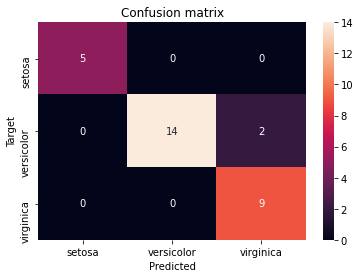

In [15]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, xticklabels=['setosa', 'versicolor', 'virginica'], 
            yticklabels=['setosa', 'versicolor', 'virginica'])
plt.xlabel('Predicted')
plt.ylabel('Target')
plt.title('Confusion matrix')

We can see that the versicolor was mispredicted for virginica twice. <br/>